# Twitter Sentiment Analysis

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/Users/hayden/coursework/CS-583 Deep Learning/583_2/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hayden/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Authentication
consumerKey = "tT2YN2AoCNk7rWv7j7OZwg3rv"
consumerSecret = "muQg43uyRbratTjDj8LTtRldygaAeSDzqh42VpkOkomNz5NNp9"
accessToken = "1169076072526336001-44GZHTdZEPM27g0VClsbFE0mcrxxov"
accessTokenSecret = "reK5LPFhI6iIUhFeXU8RaWTNy2IQjOUzTC1d0wRXFMjFU"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [15]:
#Sentiment Analysis
def percentage(part,whole):
     return 100 * float(part)/float(whole)

def pull_data(keywords, filename, noOfTweet=1000):
    tweets = tweepy.Cursor(api.search, q=keywords).items(noOfTweet)
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0
    tweet_list = []
    all_tweets = []
    neutral_list = []
    negative_list = []
    positive_list = []
        
    for tweet in tweets:
        #print(tweet.text)
        tweet_list.append(tweet.text)
        all_tweets.append(tweet)
        
        analysis = TextBlob(tweet.text)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
        neg = score["neg"]
        neu = score["neu"]
        pos = score["pos"]
        comp = score["compound"]
        polarity += analysis.sentiment.polarity

        if neg > pos:
            negative_list.append(tweet.text)
            negative += 1
        elif pos > neg:
            positive_list.append(tweet.text)
            positive += 1
        elif pos == neg:
            neutral_list.append(tweet.text)
            neutral += 1
    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positive, ".1f")
    negative = format(negative, ".1f")
    neutral = format(neutral, ".1f")
    
    pd.DataFrame(all_tweets).to_csv(filename + ".csv")
    
    tweet_list = pd.DataFrame(tweet_list)
    neutral_list = pd.DataFrame(neutral_list)
    negative_list = pd.DataFrame(negative_list)
    positive_list = pd.DataFrame(positive_list)
    print("total number: ",len(tweet_list))
    print("positive number: ",len(positive_list))
    print("negative number: ", len(negative_list))
    print("neutral number: ",len(neutral_list))
    return (tweet_list, neutral_list, positive_list, negative_list)

In [12]:
def graph_data(total, neu, pos, neg, keywords):
    labels = [
        "Positive ["+str(format(len(pos) / len(total) * 100, '.2f'))+"%]", 
        "Neutral  ["+str(format(len(neu) / len(total) * 100, '.2f'))+"%]",
        "Negative ["+str(format(len(neg) / len(total) * 100, '.2f'))+"%]"
    ]
    sizes = [len(pos), len(neu), len(neg)]
    colors = ["yellowgreen", "blue","red"]
    patches, texts = plt.pie(sizes,colors=colors, startangle=90)
    plt.style.use("default")
    plt.legend(labels)
    plt.title("Sentiment Analysis Result for: " + keywords)
    plt.axis("equal")
    plt.show()

In [13]:
biden_all, biden_neu, biden_pos, biden_neg = pull_data("cnn hunter biden laptop", "biden")

total number:  81
positive number:  8
negative number:  21
neutral number:  52


In [16]:
insur_all, insur_neu, insur_pos, insur_neg = pull_data("fox news insurrection", "insurrection")

total number:  1000
positive number:  255
negative number:  559
neutral number:  186


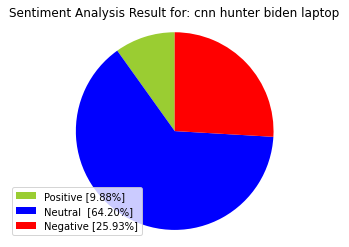

In [17]:
graph_data(biden_all, biden_neu, biden_pos, biden_neg, "cnn hunter biden laptop")

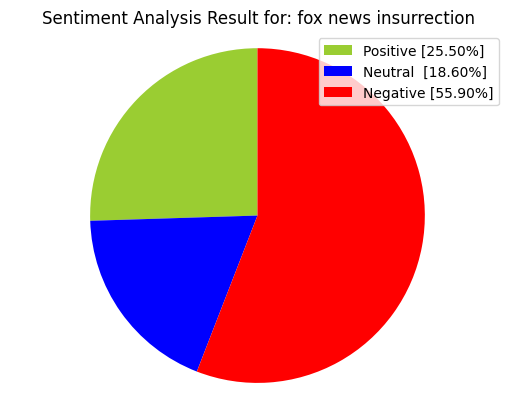

In [18]:
graph_data(insur_all, insur_neu, insur_pos, insur_neg, "fox news insurrection")

In [24]:
biden_all

,0
0,"Hey Democrats &amp; the radical leftists, as m..."
1,Imagine one of CNN's main BS manufacturers cla...
2,RT @machine1317: What? It’s no surprise to any...
3,#CNN is trying to discredit #FoxNews #Newsmax ...
4,@JennieSays_ @AhmedBaba_ When’s the last time ...
...,...
76,RT @bubbaprog: the FBI took possession of said...
77,RT @bubbaprog: the FBI took possession of said...
78,"@CNN And a more important question is, “What’s..."
79,@CNN And oddly the FBI didn’t want to take the...


In [26]:
insur_neg

,0
0,RT @Pulsa48: Fox news is a ruptured cesspool o...
1,The Republican “Fox” is no longer in the hen h...
2,"RT @RevRalphEWill: FOX NEWS, IS MAINLY RESPONS..."
3,#SundayMorning \n'The pro-Trump media world pe...
4,"🤮💩The ""bullshit factory"", also known as Fox Ne..."
...,...
554,RT @joncoopertweets: 'Cowardly and sniveling p...
555,RT @joncoopertweets: 'Cowardly and sniveling p...
556,RT @joncoopertweets: 'Cowardly and sniveling p...
557,RT @joncoopertweets: 'Cowardly and sniveling p...
